In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import operator
from numpy import argmax
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn import datasets  

In [2]:
weather = pd.read_csv(r"C:\Users\user\OneDrive\Documents\Data Analysis Course\Machine Learning\Climate Wins\2. Data Sets\weather_cleaned_filled.csv")
answers = pd.read_csv(r"C:\Users\user\OneDrive\Documents\Data Analysis Course\Machine Learning\Climate Wins\2. Data Sets\Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv")

In [3]:
classification = {
    0: 'UNPLEASANT',
    1: 'PLEASANT',
   
}

In [4]:
observations = [
    "cloud_cover", "global_radiation", "humidity", "precipitation",
    "pressure", "sunshine", "temp_max", "temp_mean", "temp_min"
]

In [5]:
#filter for 1990s
weather_1990s = weather[weather['DATE'].astype(str).str.contains('199')]
answers_1990s = answers[answers['DATE'].astype(str).str.contains('199')]

In [6]:
weather_1990s = weather_1990s.drop(columns=[c for c in ["DATE","MONTH"] if c in weather_1990s.columns], errors="ignore")
answers_1990s = answers_1990s.drop(columns=["DATE"], errors="ignore")

In [7]:
weather_1990s

BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
10958                  0            0.83          1.0217   
10959                  2            0.84          1.0238   
10960                  8            0.89          1.0231   
10961                  2            0.77          1.0265   
10962                  7            0.81          1.0286   
...                  ...             ...             ...   
14605                  7            0.74          0.9953   
14606                  8            0.88          0.9956   
14607                  8            0.84          1.0162   
14608                  7            0.80          1.0276   
14609                  7            0.86          1.0252   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
10958                    0.60                 0.00             7.2   
10959                    0.48                 0.00             2.3   
10960                    0.20                 0.00             0.0   
10961                    0.54                 0.00             5.6   
10962                    0.23                 0.04             0.2   
...                       ...                  ...             ...   
14605                    0.28                 1.93             1.0   
14606                    0.13                 1.22             0.0   
14607                    0.21                 0.11             0.1   
14608                    0.26                 0.01             0.5   
14609                    0.21                 0.09             0.0   

       BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  BELGRADE_cloud_cover  \
10958             -2.1            -3.6             1.2                     2   
10959             -1.8            -3.9             1.7                     8   
10960             -2.2            -4.2             0.4                     5   
10961             -0.7            -3.1             2.2                     5   
10962              0.0            -3.1             2.6                     0   
...                ...             ...             ...                   ...   
14605              5.0             1.5             6.5                     5   
14606              2.4             1.0             3.4                     8   
14607              1.8             1.0             2.7                     6   
14608              1.1            -0.3             3.4                     3   
14609              0.7            -0.7             1.9                     7   

       ...  VALENTIA_pressure  VALENTIA_global_radiation  \
10958  ...             1.0068                       0.20   
10959  ...             1.0040                       0.21   
10960  ...             1.0094                       0.38   
10961  ...             1.0112                       0.13   
10962  ...             1.0108                       0.20   
...    ...                ...                        ...   
14605  ...             0.9954                       0.15   
14606  ...             1.0102                       0.41   
14607  ...             1.0229                       0.35   
14608  ...             1.0171                       0.14   
14609  ...             1.0172                       0.12   

       VALENTIA_precipitation  VALENTIA_sunshine  VALENTIA_temp_mean  \
10958                    0.51                2.0                 6.9   
10959                    1.48                0.1                 7.3   
10960                    0.00                4.9                 7.8   
10961                    0.92                0.0                 6.5   
10962                    0.56                1.2                 9.4   
...                       ...                ...                 ...   
14605                    0.41                0.1                 4.8   
14606                    0.03                5.1                 5.3   
14607                    0.85                3.9                 7.1   
14608                    0.27              

In [8]:
X = weather_1990s.to_numpy() 
y = np.array(answers_1990s)  

In [9]:
X.shape

(3652, 135)

In [10]:
y.shape

(3652, 15)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2921, 135) (2921, 15)
(731, 135) (731, 15)


In [14]:
answers_station = answers.fillna(0).astype(int)  # explicitly numeric, no NaN

In [15]:
clf = RandomForestClassifier(n_estimators=10, max_depth=10, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=10, random_state=42)

In [16]:
y_test_flat = (y_test.mean(axis=1) >= 0.5).astype(int)  # majority vote
y_pred_flat = (clf.predict(X_test).mean(axis=1) >= 0.5).astype(int)

accuracy = accuracy_score(y_test_flat, y_pred_flat)
print(f"Model Accuracy: {accuracy:.4f}")

Model Accuracy: 0.9658


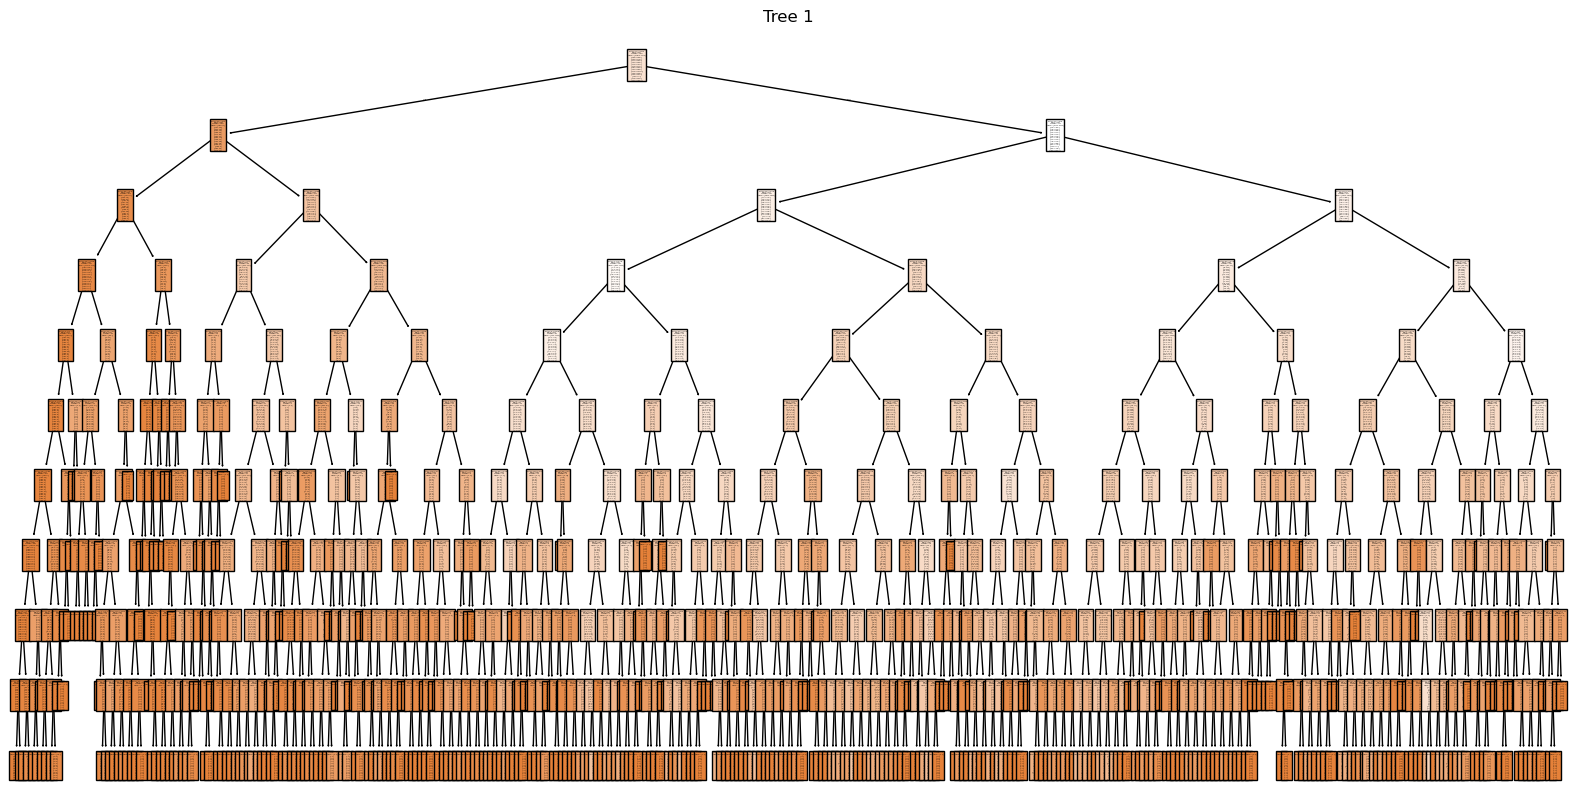

In [17]:
plt.figure(figsize=(20, 10))
plot_tree(clf.estimators_[0], feature_names=[f"Feature_{i}" for i in range(X.shape[1])], filled=True)
plt.title("Tree 1")
plt.show()

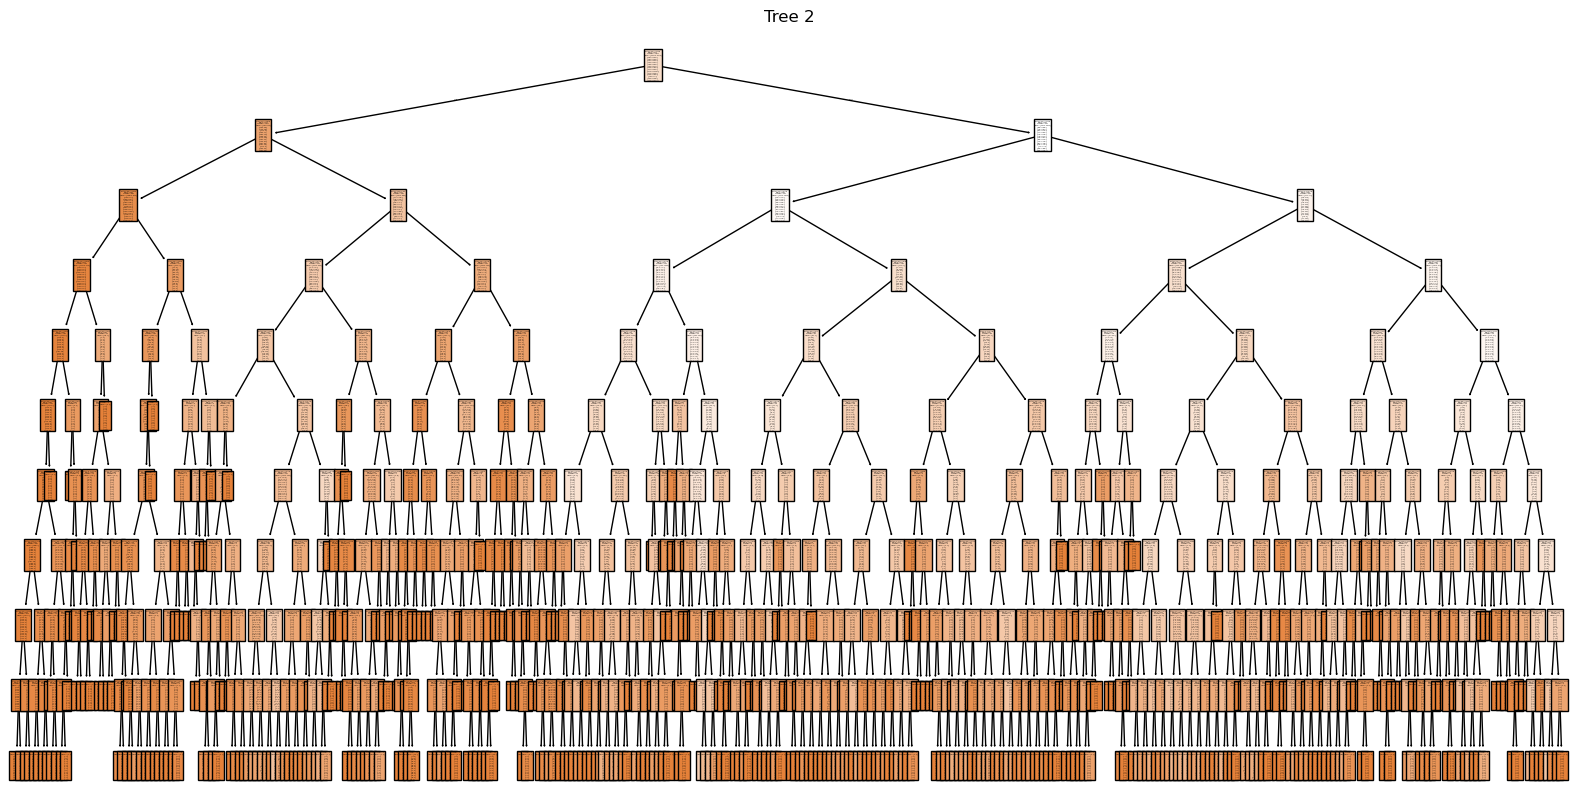

In [18]:
plt.figure(figsize=(20, 10))
plot_tree(clf.estimators_[1],  feature_names=[f"Feature_{i}" for i in range(X.shape[1])], filled=True)
plt.title("Tree 2")
plt.show()

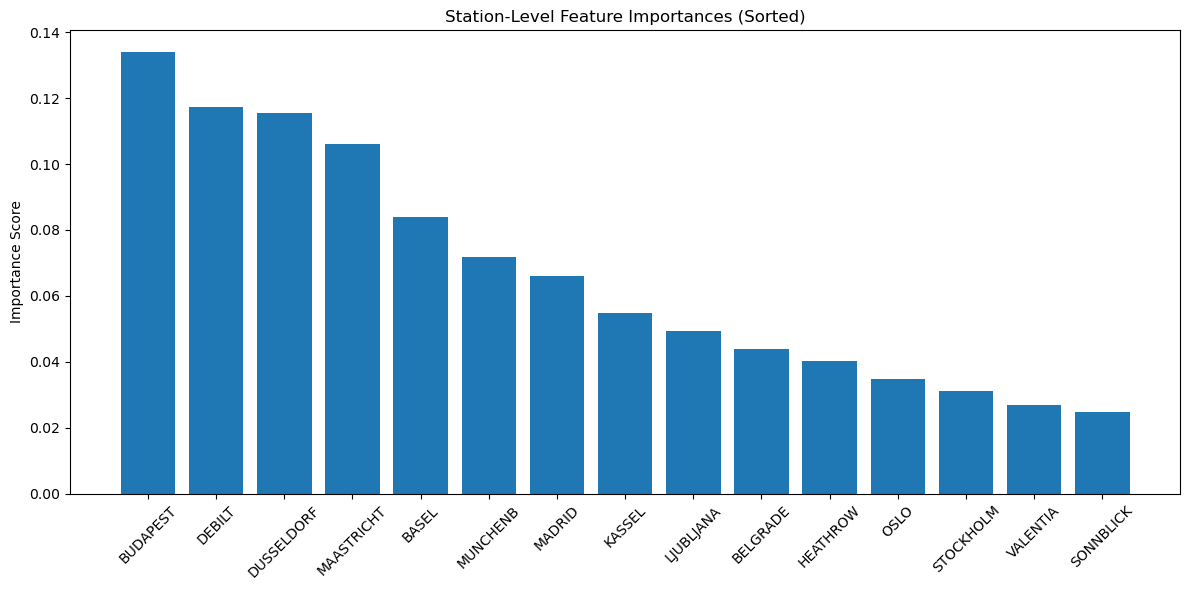

In [22]:
# Define station names manually
station_names = [
    "BASEL", "BELGRADE", "BUDAPEST", "DEBILT", "DUSSELDORF",
    "HEATHROW", "KASSEL", "LJUBLJANA", "MAASTRICHT", "MADRID",
    "MUNCHENB", "OSLO", "SONNBLICK", "STOCKHOLM", "VALENTIA"
]

# Reshape the flat feature importances into 15x9 (stations × features)
importances = clf.feature_importances_.reshape(15, 9)

# Sum over the 9 features to get total importance per station
station_importance = importances.sum(axis=1)

# Sort by importance
sorted_indices = np.argsort(station_importance)[::-1]  # descending
sorted_names = [station_names[i] for i in sorted_indices]
sorted_importance = station_importance[sorted_indices]

# Plot
plt.figure(figsize=(12, 6))
plt.bar(sorted_names, sorted_importance)
plt.title("Station-Level Feature Importances (Sorted)")
plt.ylabel("Importance Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [23]:
station = "BUDAPEST"

# Extract station features
X = weather[[col for col in weather.columns if col.startswith(station)]]

# Extract target, convert to 0/1 and fill any missing with 0 (if needed)
y = answers[f"{station}_pleasant_weather"].fillna(0).astype(int).values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Random Forest
clf = RandomForestClassifier(n_estimators=10, max_depth=10, random_state=42)
clf.fit(X_train, y_train)

# Evaluate
accuracy = clf.score(X_test, y_test)
print(f"{station} Accuracy: {accuracy:.4f}")

BUDAPEST Accuracy: 1.0000


In [25]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=10, random_state=42)

In [26]:
X_train.shape

(18360, 9)

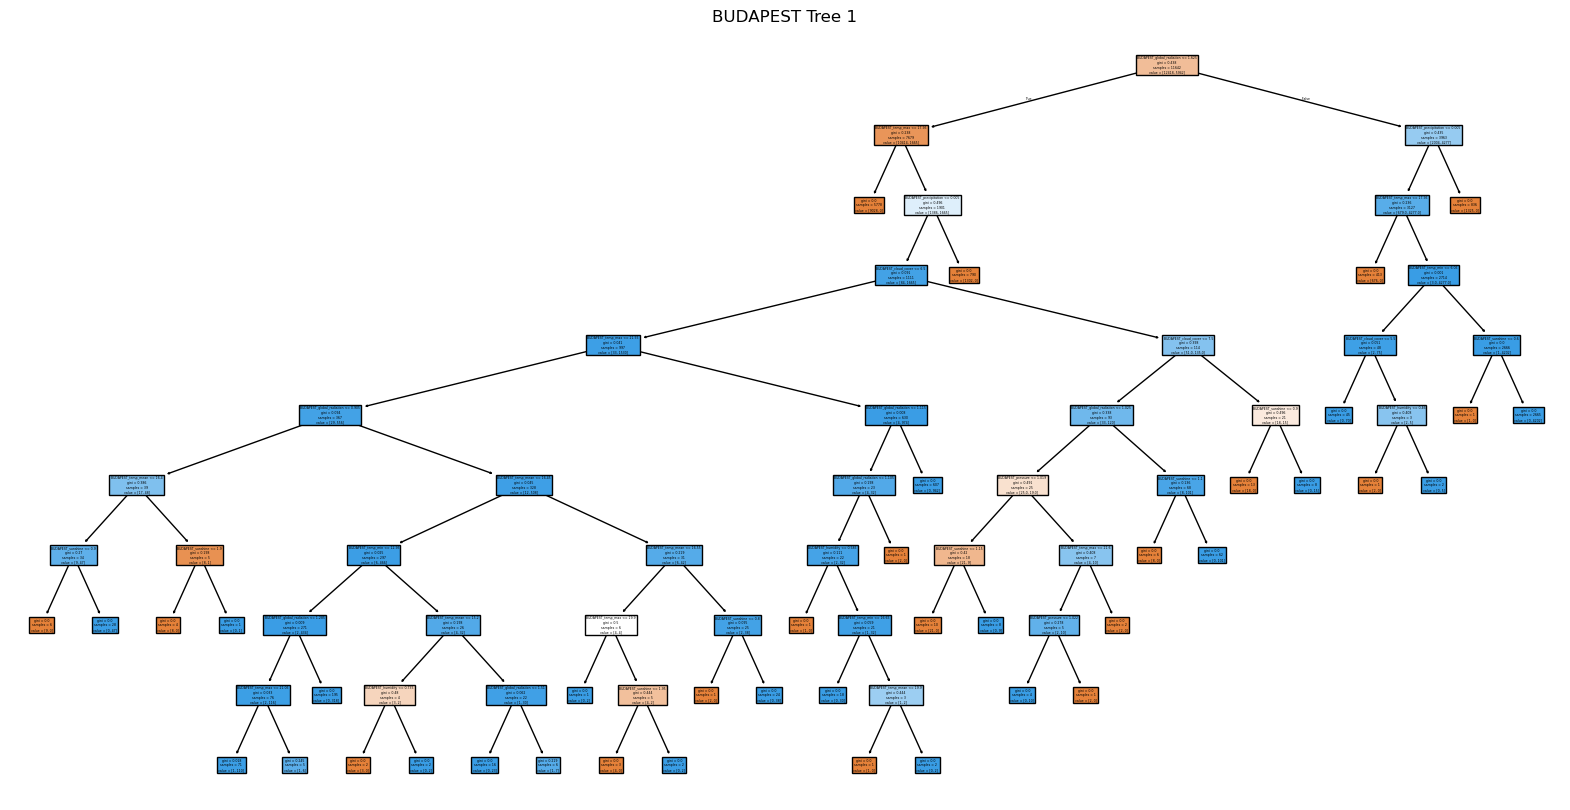

In [30]:
station_cols = [
    'BUDAPEST_cloud_cover',
    'BUDAPEST_humidity',
    'BUDAPEST_pressure',
    'BUDAPEST_global_radiation',
    'BUDAPEST_precipitation',
    'BUDAPEST_sunshine',
    'BUDAPEST_temp_mean',
    'BUDAPEST_temp_min',
    'BUDAPEST_temp_max'
]
# Plot decision tree from first estimator in the forest
plt.figure(figsize=(20, 10))
plot_tree(clf.estimators_[0], feature_names=station_cols, filled=True)
plt.title("BUDAPEST Tree 1")
plt.show()

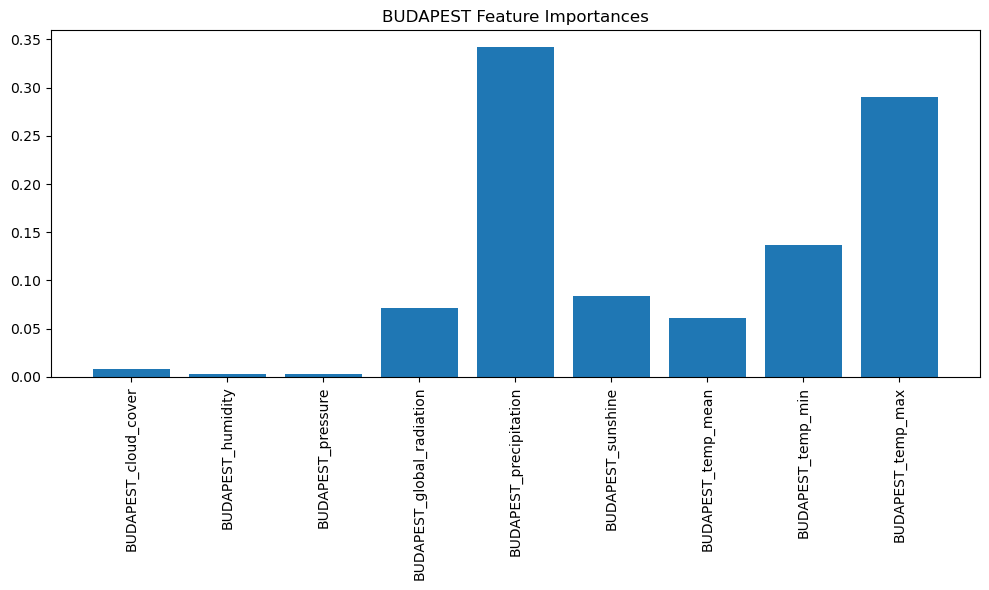

In [31]:
# Plot feature importances for BUDAPEST
importances_station = clf.feature_importances_

plt.figure(figsize=(10, 6))
plt.bar(station_cols, importances_station)
plt.xticks(rotation=90)
plt.title("BUDAPEST Feature Importances")
plt.tight_layout()
plt.show()

In [32]:
station = "DEBILT"

# Extract station features
X = weather[[col for col in weather.columns if col.startswith(station)]]

# Extract target, convert to 0/1 and fill any missing with 0 (if needed)
y = answers[f"{station}_pleasant_weather"].fillna(0).astype(int).values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Random Forest
clf = RandomForestClassifier(n_estimators=10, max_depth=10, random_state=42)
clf.fit(X_train, y_train)

# Evaluate
accuracy = clf.score(X_test, y_test)
print(f"{station} Accuracy: {accuracy:.4f}")

DEBILT Accuracy: 1.0000


In [33]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=10, random_state=42)

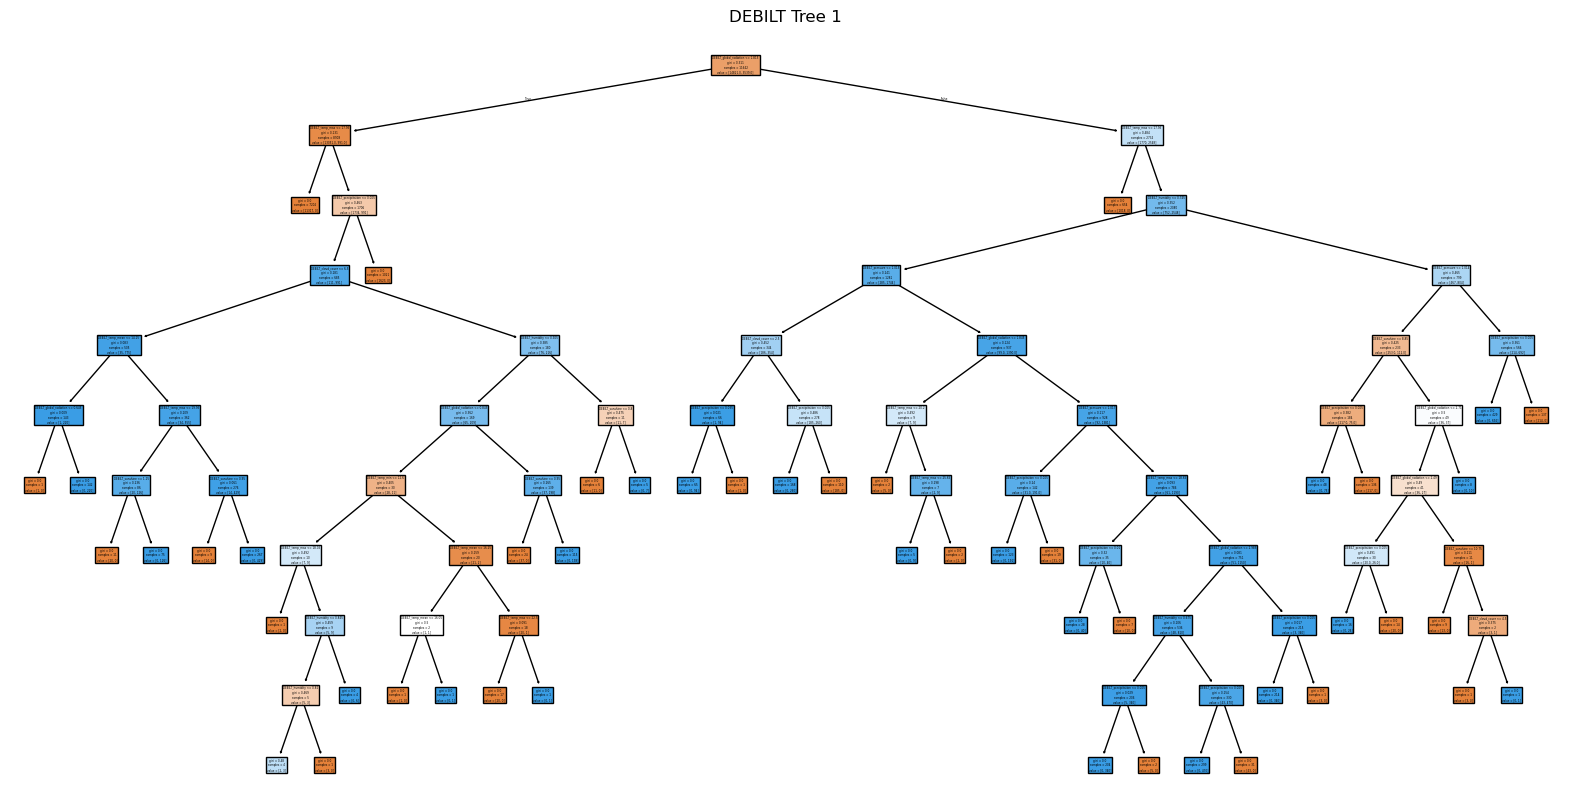

In [35]:
station_cols = [
    'DEBILT_cloud_cover',
    'DEBILT_humidity',
    'DEBILT_pressure',
    'DEBILT_global_radiation',
    'DEBILT_precipitation',
    'DEBILT_sunshine',
    'DEBILT_temp_mean',
    'DEBILT_temp_min',
    'DEBILT_temp_max'
]
# Plot decision tree from first estimator in the forest
plt.figure(figsize=(20, 10))
plot_tree(clf.estimators_[0], feature_names=station_cols, filled=True)
plt.title("DEBILT Tree 1")
plt.show()

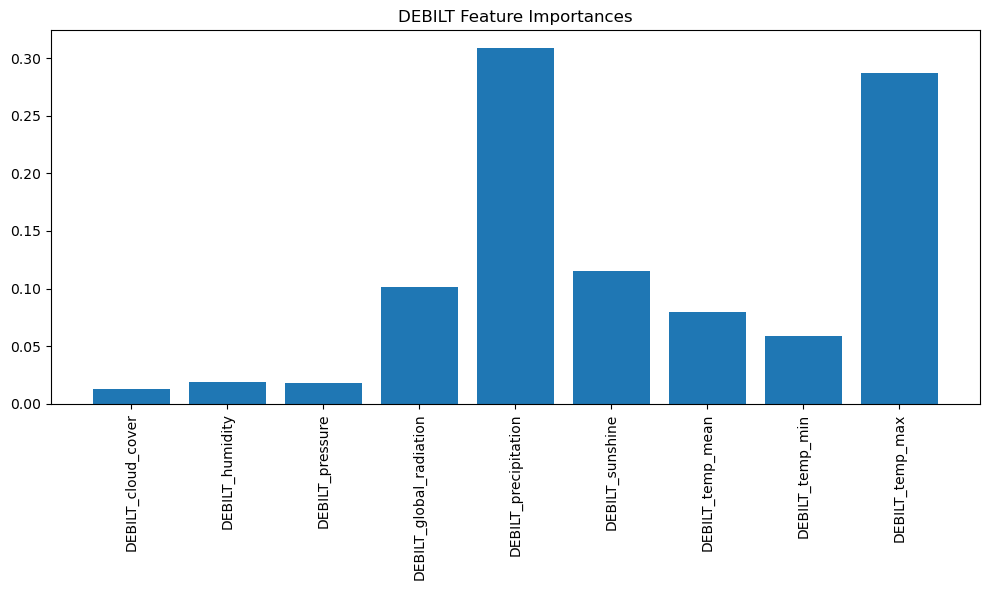

In [36]:
# Plot feature importances for DEBILT
importances_station = clf.feature_importances_

plt.figure(figsize=(10, 6))
plt.bar(station_cols, importances_station)
plt.xticks(rotation=90)
plt.title("DEBILT Feature Importances")
plt.tight_layout()
plt.show()

In [37]:
station = "DUSSELDORF"

# Extract station features
X = weather[[col for col in weather.columns if col.startswith(station)]]

# Extract target, convert to 0/1 and fill any missing with 0 (if needed)
y = answers[f"{station}_pleasant_weather"].fillna(0).astype(int).values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Random Forest
clf = RandomForestClassifier(n_estimators=10, max_depth=10, random_state=42)
clf.fit(X_train, y_train)

# Evaluate
accuracy = clf.score(X_test, y_test)
print(f"{station} Accuracy: {accuracy:.4f}")

DUSSELDORF Accuracy: 1.0000


In [39]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=10, random_state=42)

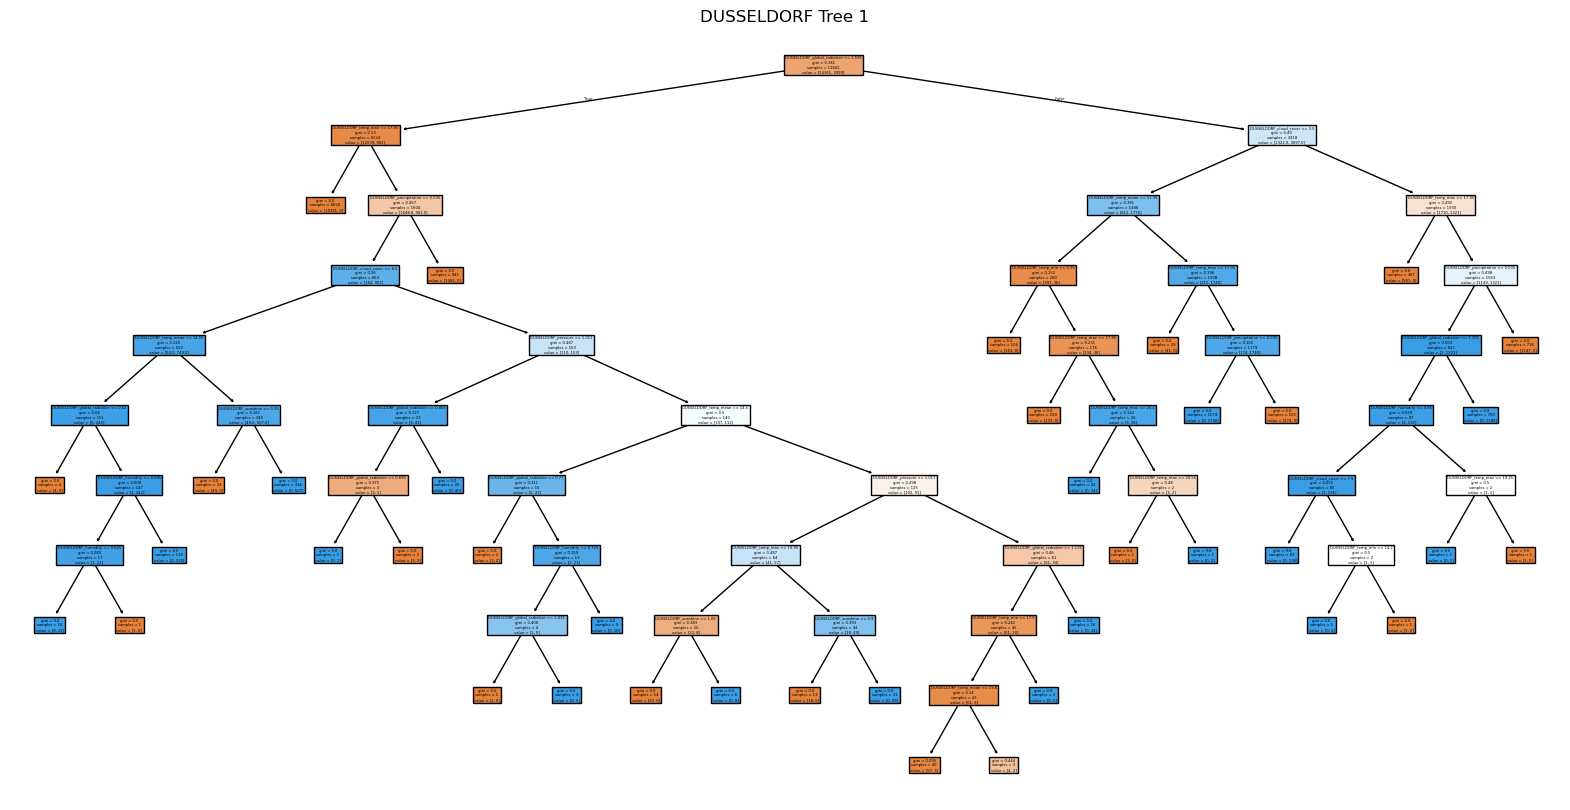

In [40]:
station_cols = [
    'DUSSELDORF_cloud_cover',
    'DUSSELDORF_humidity',
    'DUSSELDORF_pressure',
    'DUSSELDORF_global_radiation',
    'DUSSELDORF_precipitation',
    'DUSSELDORF_sunshine',
    'DUSSELDORF_temp_mean',
    'DUSSELDORF_temp_min',
    'DUSSELDORF_temp_max'
]
# Plot decision tree from first estimator in the forest
plt.figure(figsize=(20, 10))
plot_tree(clf.estimators_[0], feature_names=station_cols, filled=True)
plt.title("DUSSELDORF Tree 1")
plt.show()

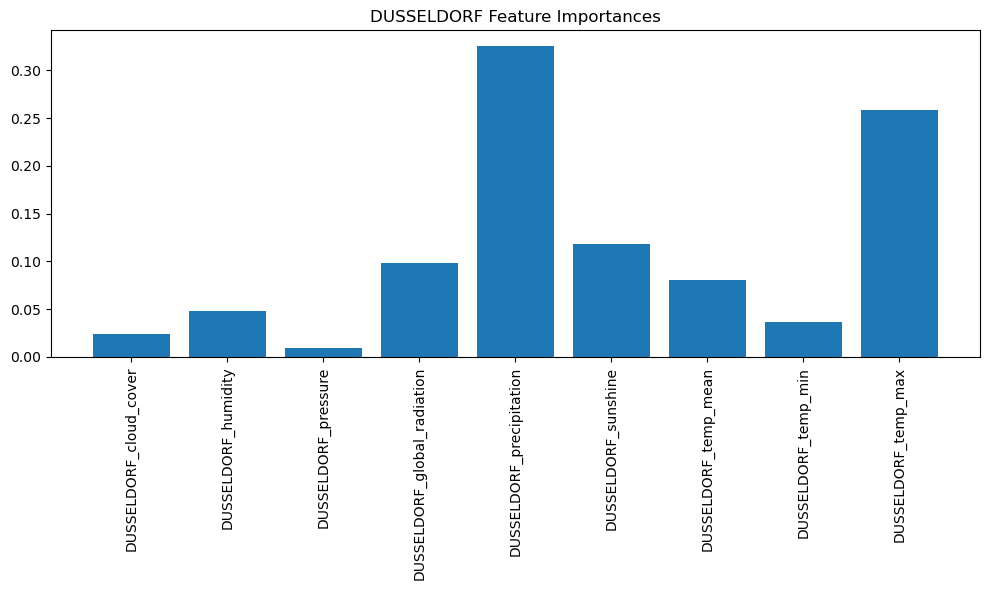

In [41]:
# Plot feature importances for DUSSELDORF
importances_station = clf.feature_importances_

plt.figure(figsize=(10, 6))
plt.bar(station_cols, importances_station)
plt.xticks(rotation=90)
plt.title("DUSSELDORF Feature Importances")
plt.tight_layout()
plt.show()